# Лабораторная работа №2

Юрьев Сергей гр.9382

## Цель работы

Практическое применение дискретного преобразования Фурье c использованием библиотек Python для анализа речевых сигналов.

## Задачи

1. Используя ДПФ построить траекторию основного тона (F0) на записи своего голоса.
2. Используя ДПФ построить траектории второй, третьей и четвертой формантных частот на записи своего голоса.
3. Построить сонограмму по записи своего голоса.

/tmp/ipykernel_73569/256168048.py:9: WavFileWarning:

Reached EOF prematurely; finished at 380204 bytes, expected 2147418156 bytes from header.



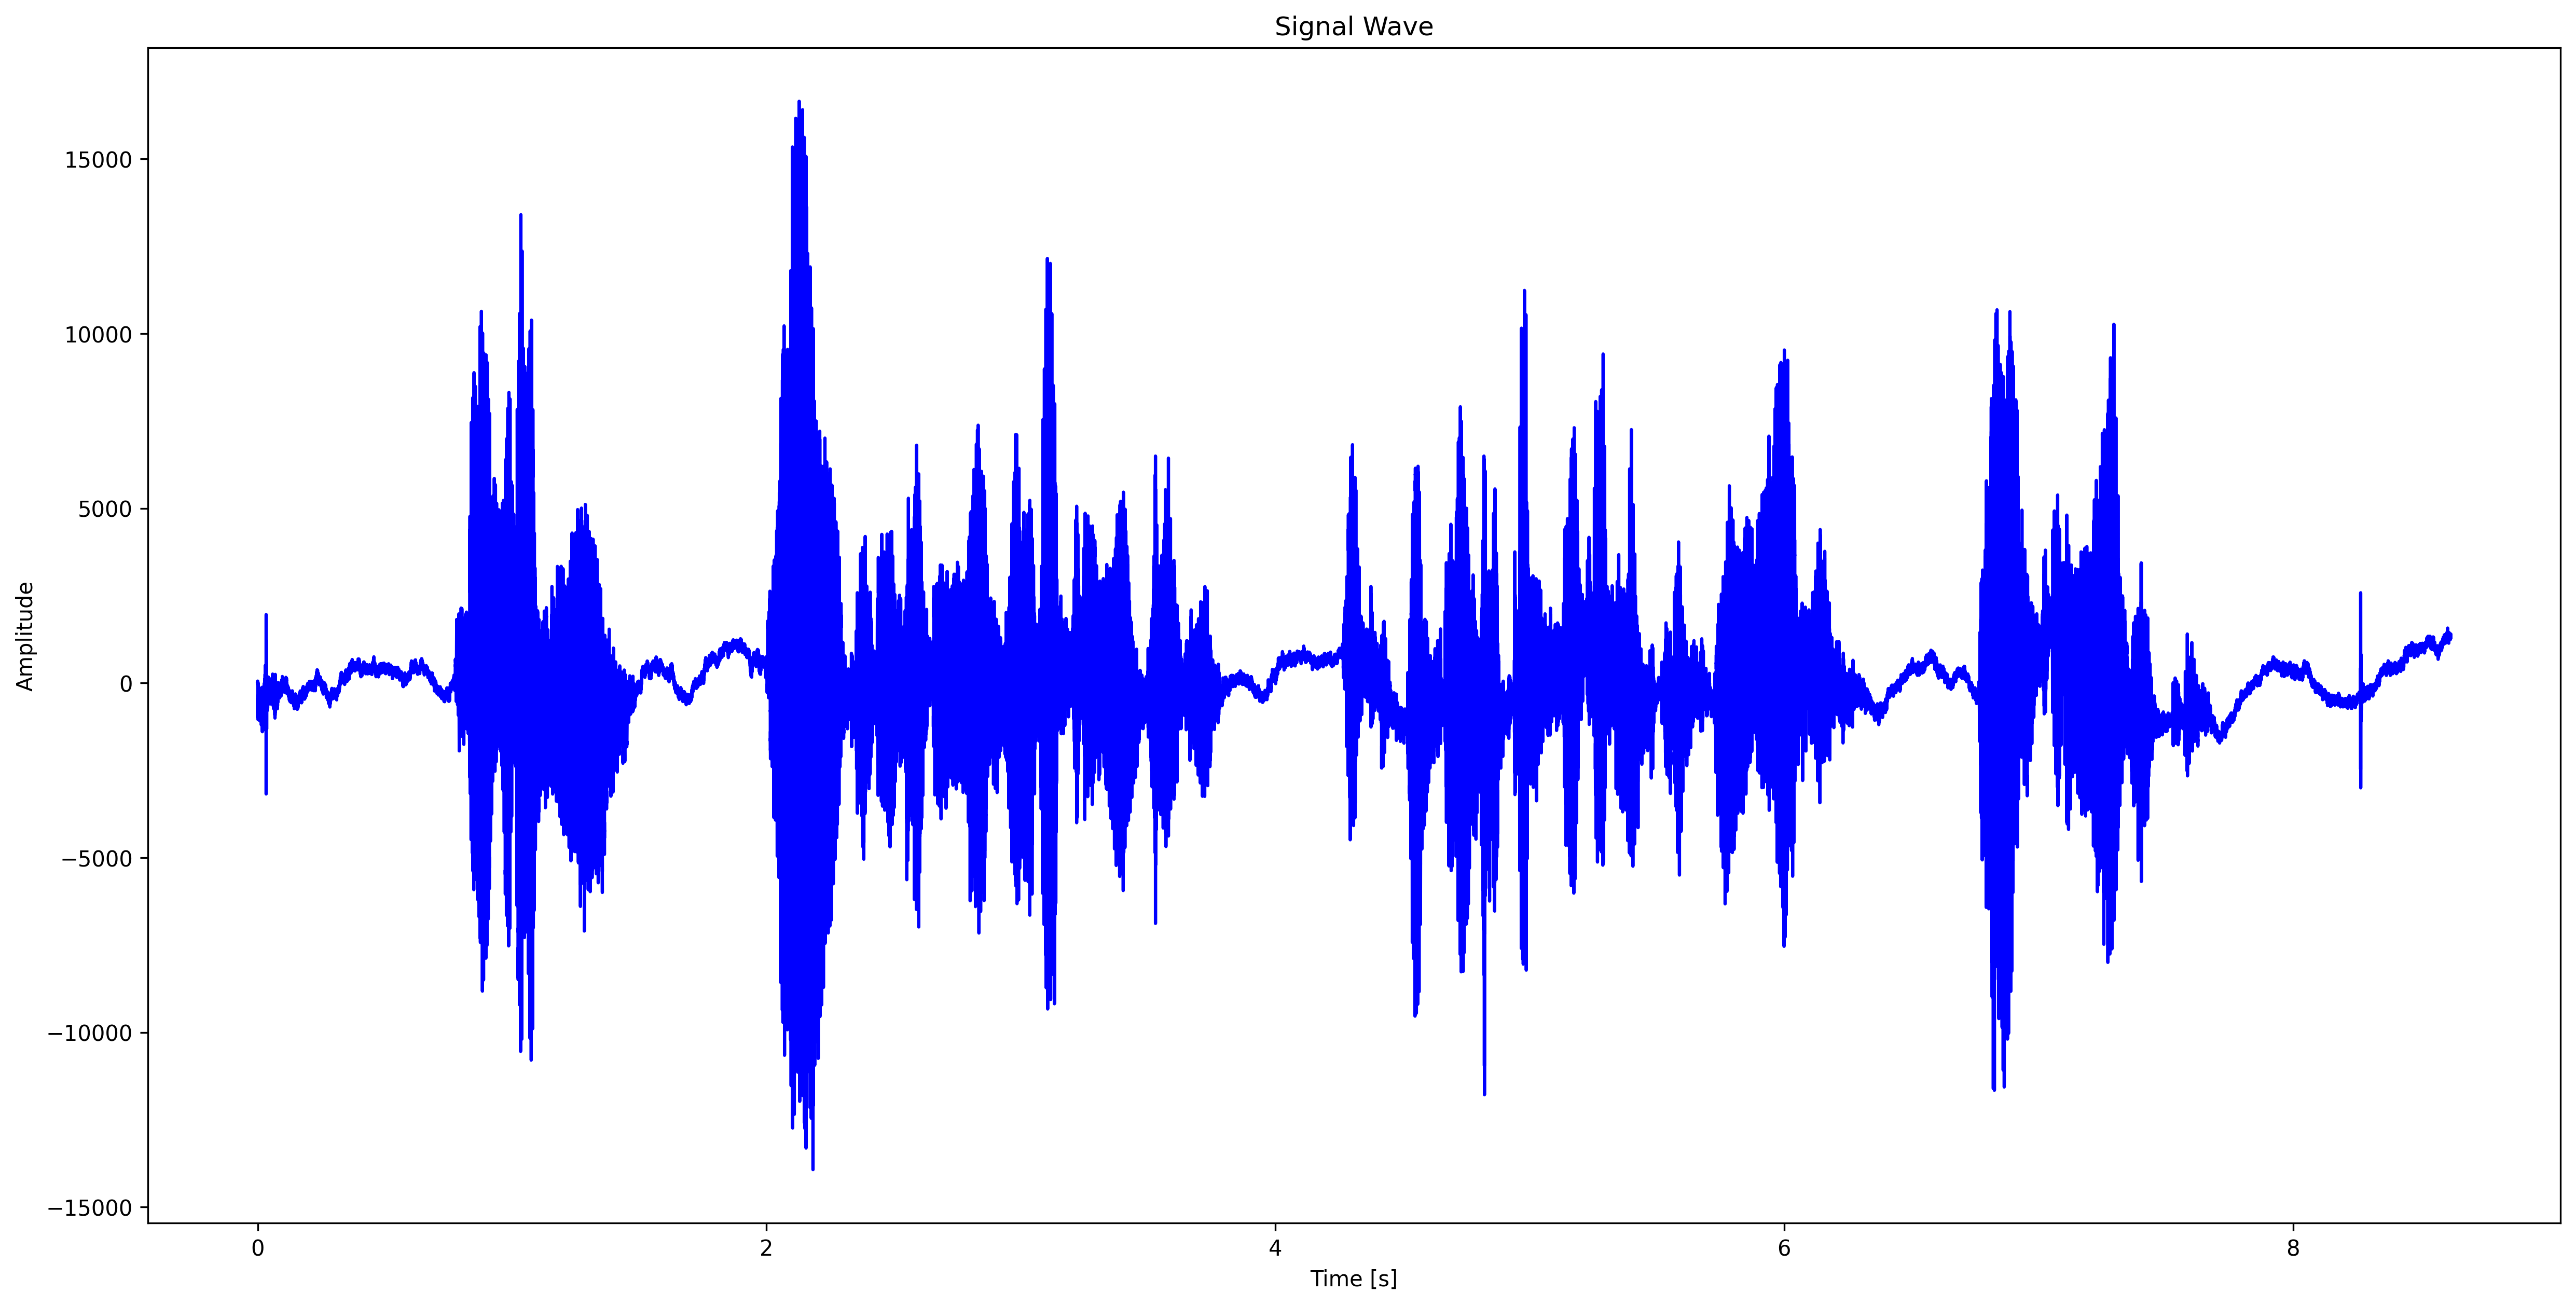

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import spectrogram
from scipy.io import wavfile
import more_itertools as it

plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["figure.dpi"] = 300
freq_sample, sig_audio = wavfile.read("my_voice.wav")

x_sig = np.linspace(0, len(sig_audio) / freq_sample, num=len(sig_audio))
plt.title("Signal Wave")
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
    
plt.plot(x_sig, sig_audio, color='#0000ff')

## Используя ДПФ построить траекторию основного тона (F0) на записи своего голоса. 

Разбиваем сигнал на отрезки длинной N. Сдвиг для следующего интервала 0.25*N. 

На каждом отрезке сигнал предварительно умножаем на окно Кайзера-Бесселя, затем вычисляем ДПФ и на его основе амплитудный спектр в интервале (0,N/2):

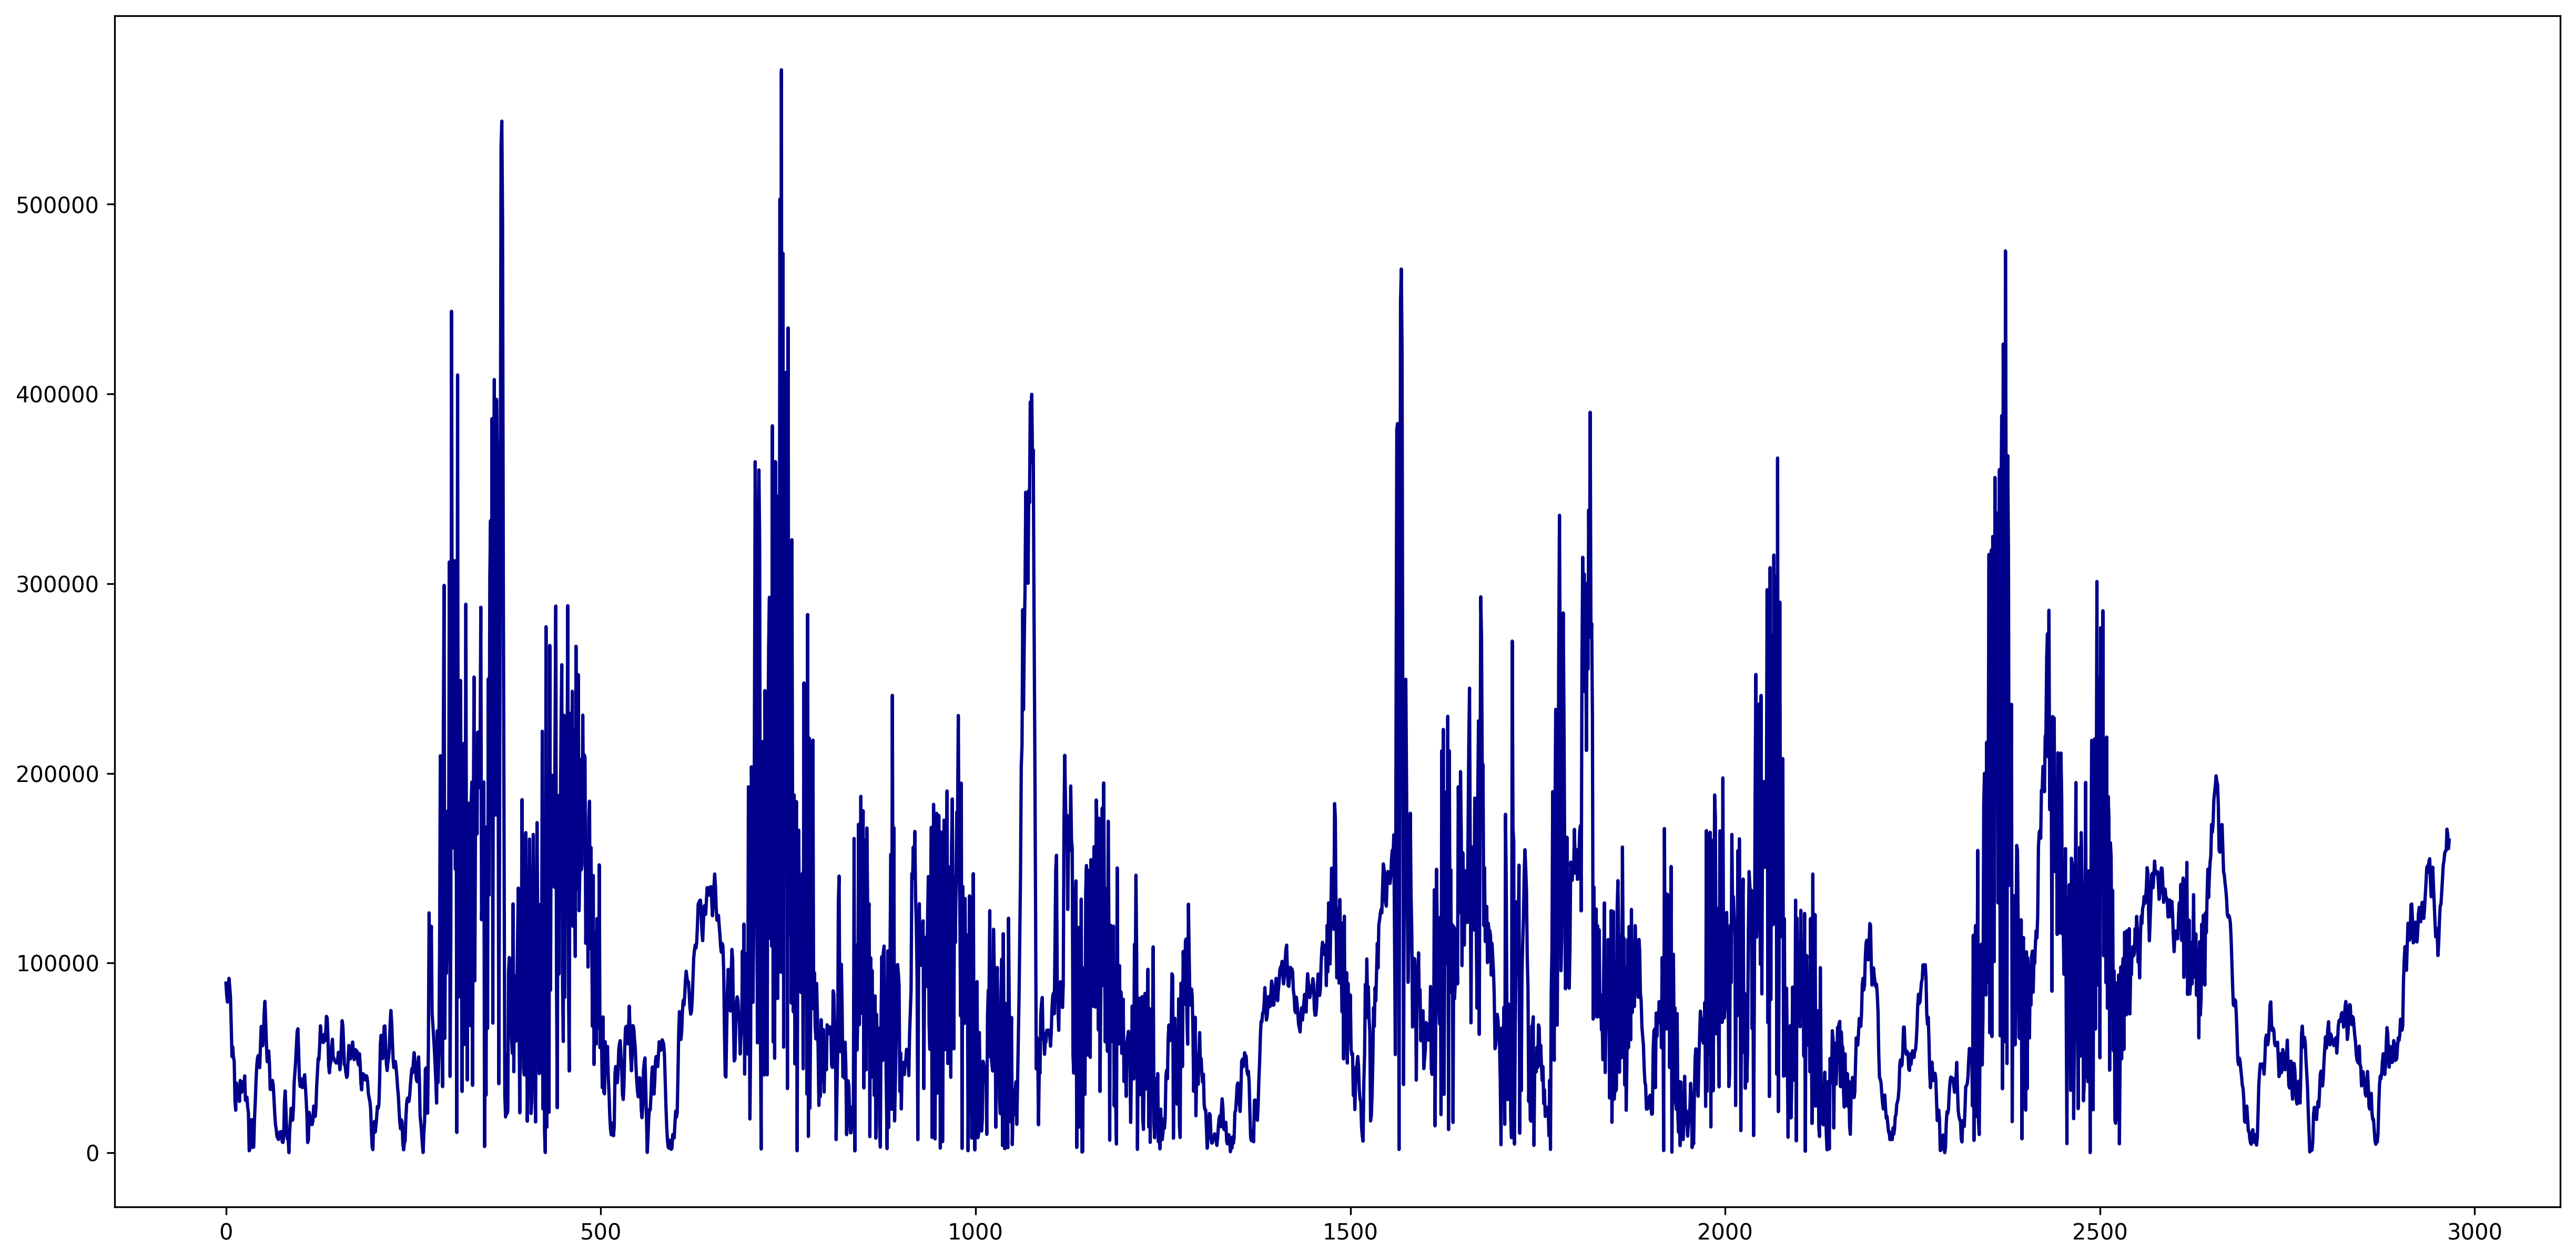

In [35]:
N = 256
intervals = list(it.windowed(sig_audio, n=N, step=int(0.25*N)))
intervals[-1] = [i for i in intervals[-1] if i]

intervals = [i*np.blackman(len(i)) for i in intervals]

def DFT(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N) 
    return np.dot(e, x)

dft_intervals = [DFT(i) for i in intervals]

amplitude_spectrum = [(sum([j**2 for j in i[:int(len(i)/2)]])**0.5).real for i in dft_intervals]
plt.plot(amplitude_spectrum, color='#00008b')

Строим форманту F0:

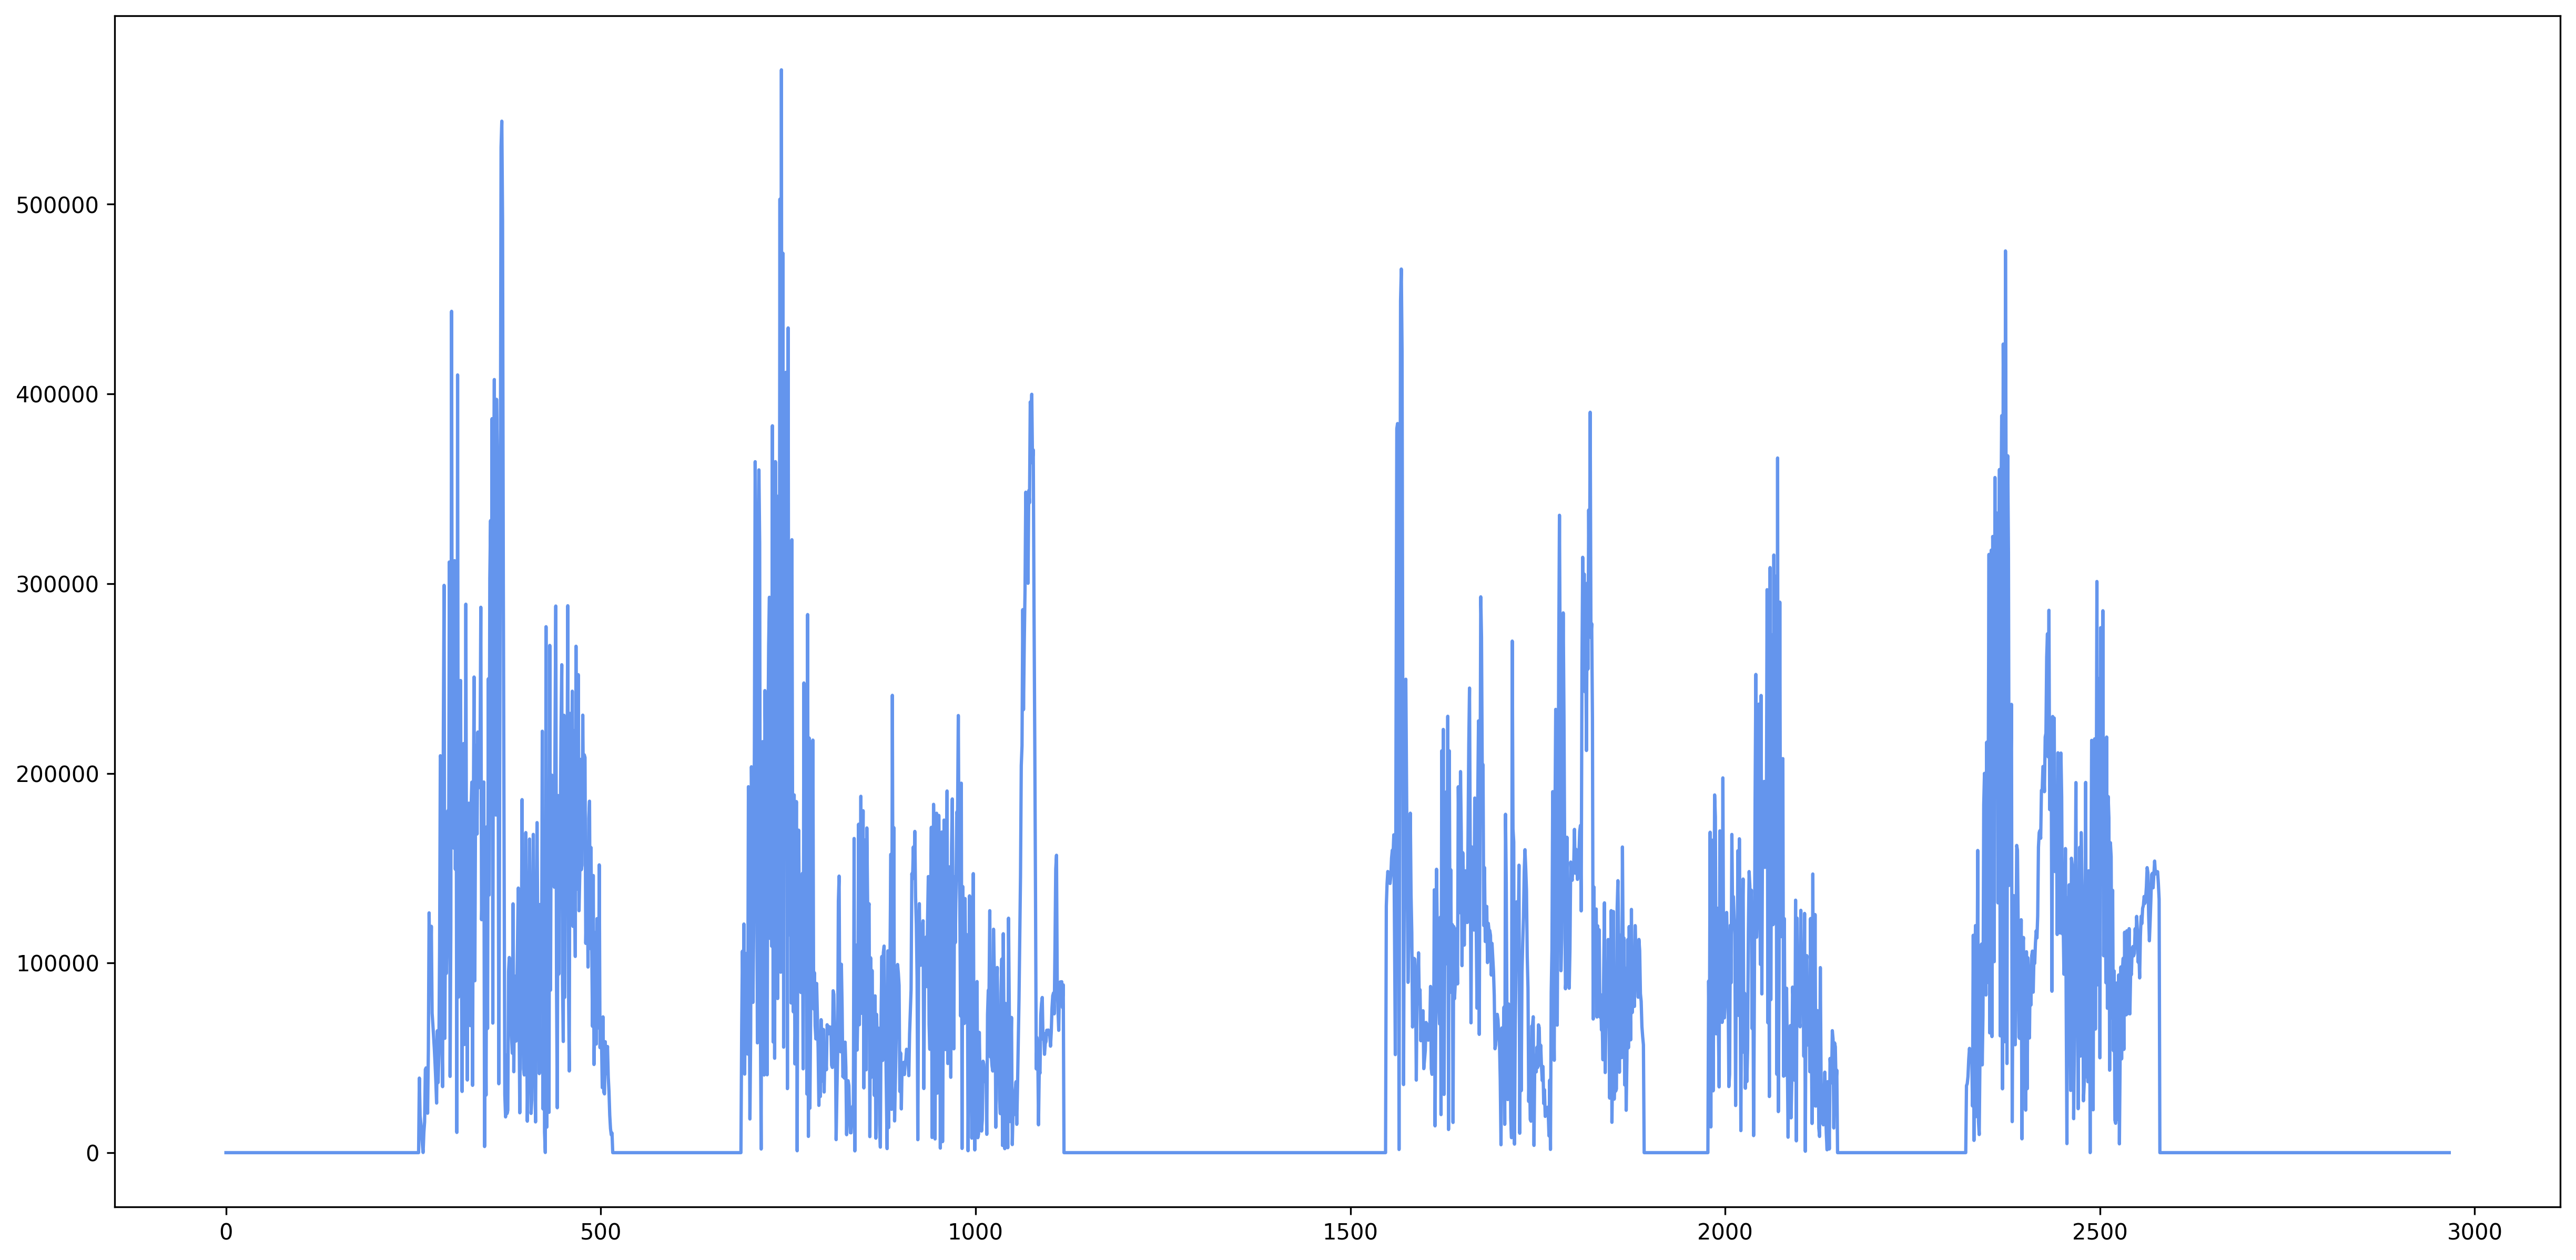

In [36]:
F0 = []
arrs = list(it.windowed(amplitude_spectrum, n=round(freq_sample/N), step=round(freq_sample/N)))
arrs[-1] = [i for i in arrs[-1] if i]

for i in range(len(arrs)):
    arrs[i] = list(arrs[i])

for i in arrs:
    interval = np.array(i)
    if interval.max() > 2.2e5:            
        F0 += interval.tolist()
    else:
        F0 += [0 for i in range(len(interval))]
            
plt.plot(F0, color='#6495ED')

## Построение траектории второй, третьей и четвертой формантных частот 

Вторая формантная частота:

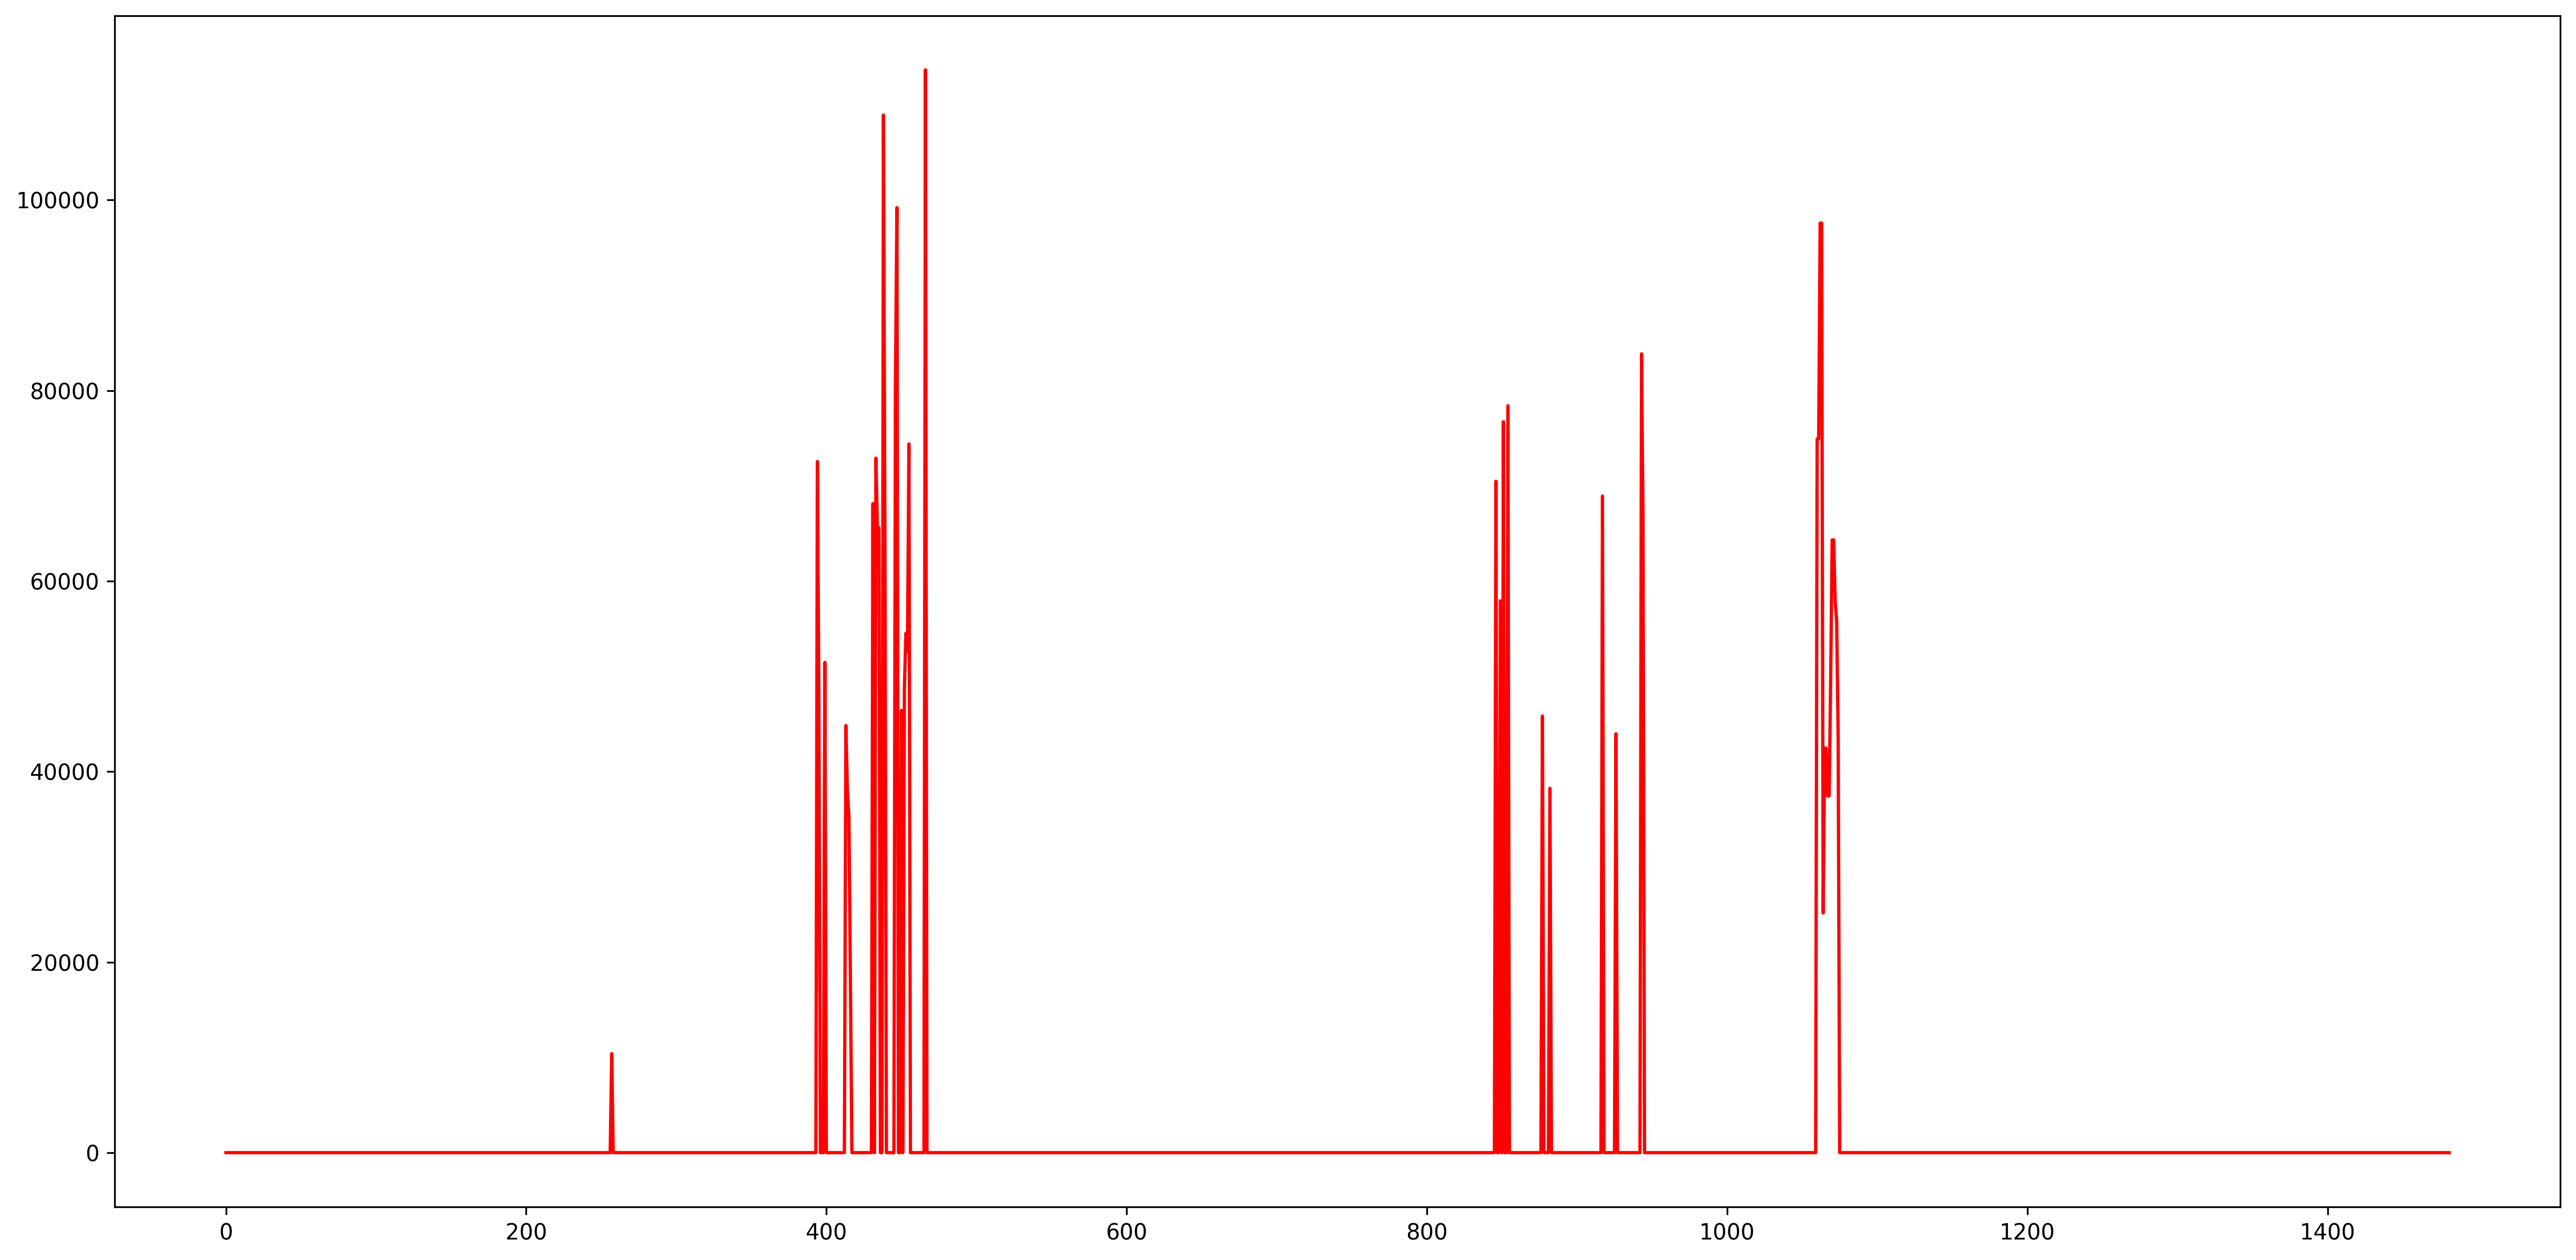

In [40]:
F1 = []
i = 1

while i < round(len(F0)/2)-1:
    cur_max = max([F0[2*i-1],F0[2*i],F0[2*i+1]])
    if F0[i] > 2*cur_max:
        F1 += [cur_max]
    else:
        F1 += [0]
    i += 1
    
plt.plot(F1,color='#ff0000')

Третья формантная частота:

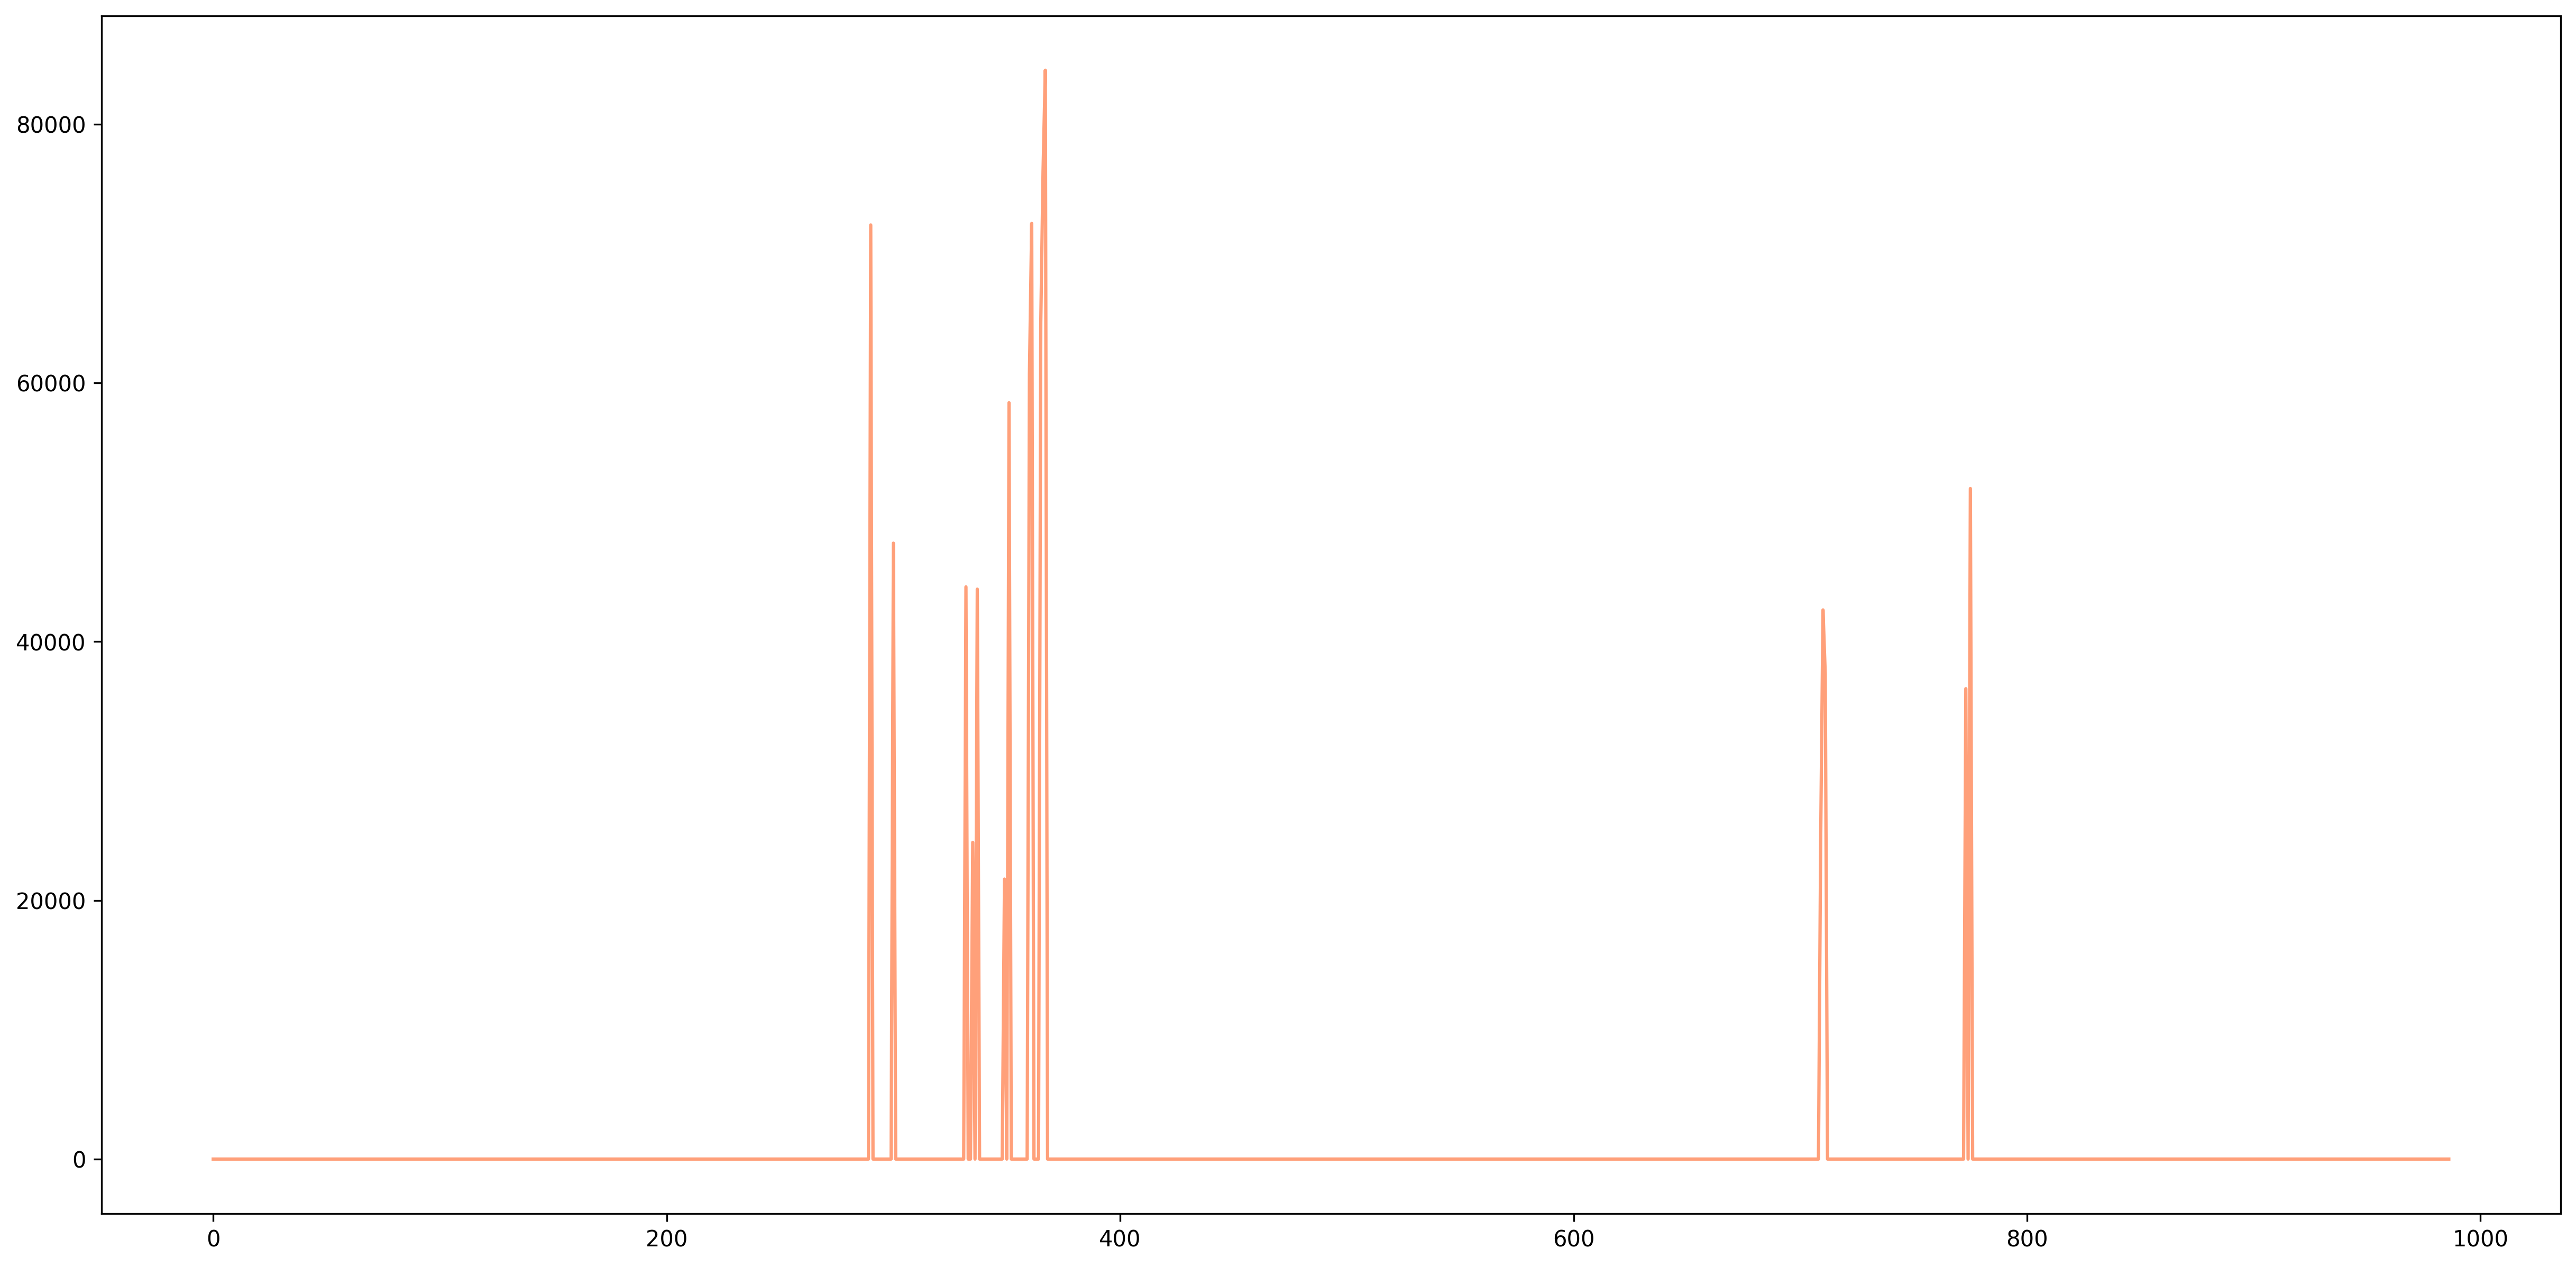

In [41]:
F2 = []
i = 1

while i < round(len(F0)/3)-1:
    cur_max = max([F0[3*i-1],F0[3*i],F0[3*i+1]])
    if F0[i] > 4*cur_max:
        F2 += [cur_max]
    else:
        F2 += [0]
    i += 1
    
plt.plot(F2, color='#FFA07A')

Четвертая формантная частота:

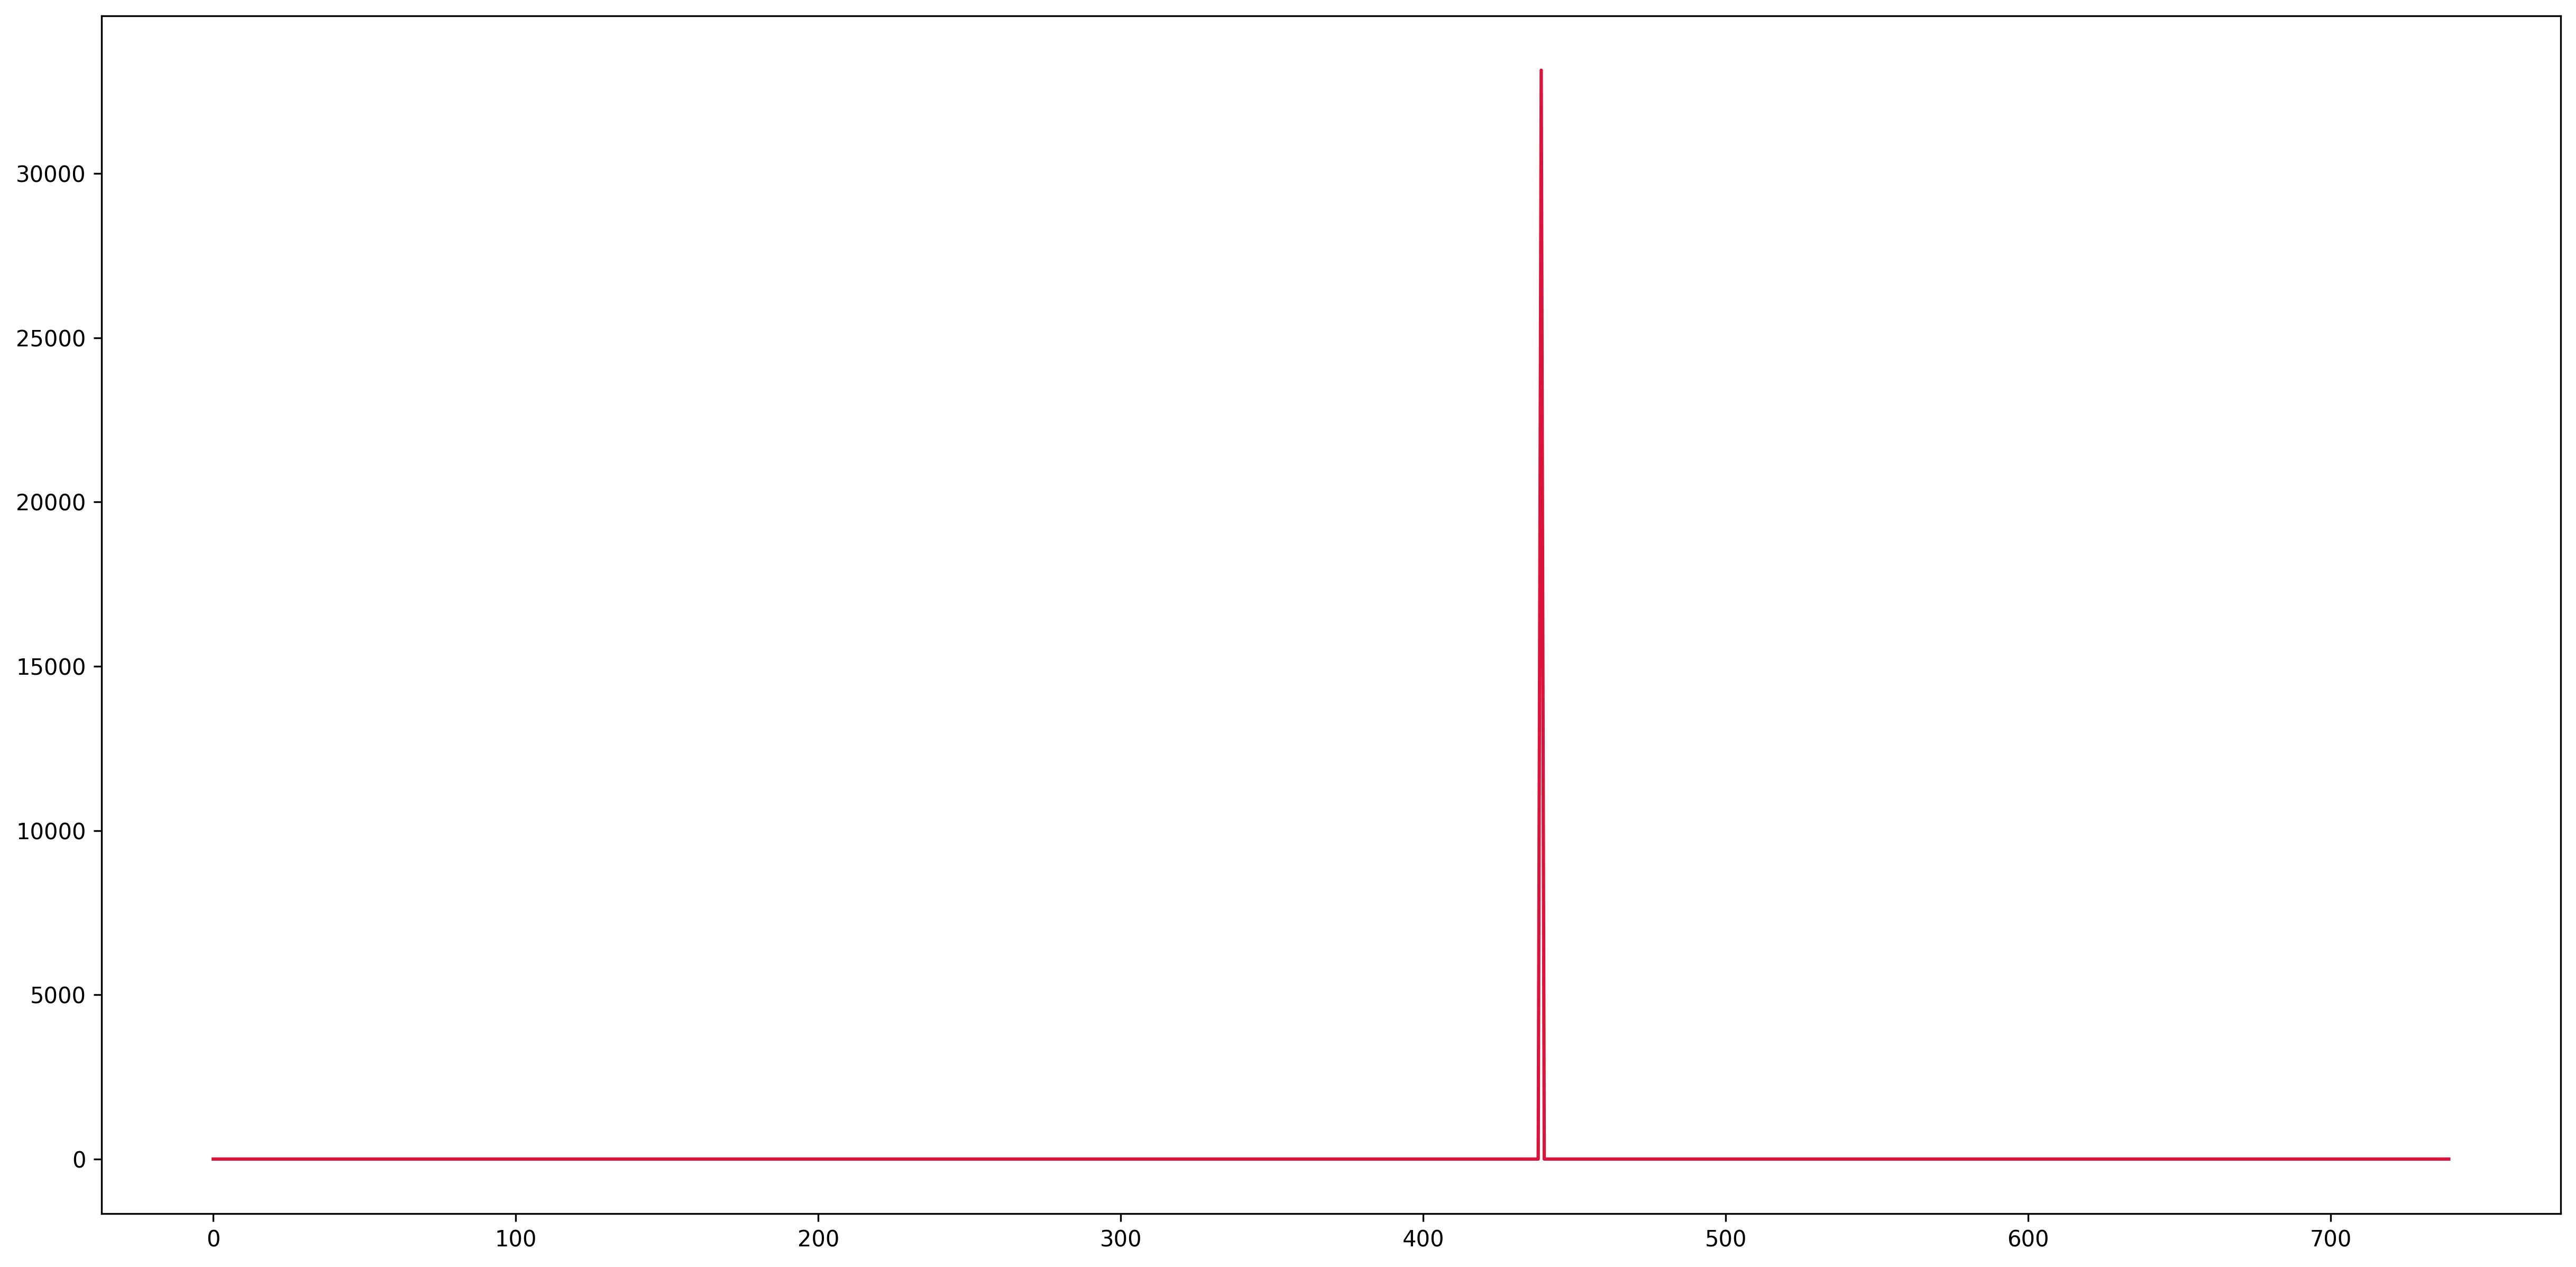

In [42]:
F3 = []
i = 1

while i < round(len(F0)/4)-1:
    cur_max = max([F0[4*i-1],F0[4*i],F0[4*i+1]])
    if F0[i] > 8*cur_max:
        F3 += [cur_max]
    else:
        F3 += [0]
    i += 1
    
plt.plot(F3,color='#DC143C')

## Построение сонограммы 

In [44]:
import plotly.express as px

for i in arrs:
    for j in range(len(i)):
        if i[j] > 3.7e6:
            i[j] = 0

print([max(i) for i in arrs])
plot_arr = np.array(arrs[:-1], dtype=float)
fig = px.imshow(plot_arr)
fig.show()

[91907.26795784327, 71865.2801357604, 74967.17186312706, 443592.8592757718, 543824.8549582963, 288362.523145537, 77246.55452497478, 146920.09154313756, 570895.4423987258, 283701.0617193891, 241130.34330636615, 230468.96094109747, 399844.7028404743, 209512.43357677478, 146295.02050622093, 71396.50096307593, 109419.02213759738, 184052.83330585668, 465874.2992179134, 293042.75802584144, 336052.96852989355, 390369.1454674006, 170878.84509957556, 308476.7220784326, 366240.74488017306, 120806.12136396523, 99140.1443527503, 475405.88383960206, 285956.65435236786, 301135.3648408809, 198669.0615847289, 146357.73277906014, 79707.68151171274, 131110.83908457376, 170554.61517587758]


## Выводы

Используя ДПФ, была построена траектория основного тона. Были построены траектории для второй, третьей и четвертой формантных частот. Построена сонограмма.